In [140]:
import pandas as pd
df = pd.read_csv("./15-Points.csv")


In [141]:
class City:
    def __init__(self, _id, x, y):
        self._id =int(_id) - 1
        self.x = x
        self.y = y


    def __repr__(self) -> str:
        return f"City ID : {self._id}  , Coor : {[self.x , self.y]}"


In [142]:
cities = []

for i in range(len(df)):
    cities.append(City(df.iloc[i]["City"]  , df.iloc[i]["x"] ,df.iloc[i]["y"]   ))


In [143]:
class Ant:
    def __init__(self, start_city):
        self.visited = [start_city]
        self.tour_length = 0

    def visit_city(self, city, distance):
        self.visited.append(city)
        self.tour_length += distance


    def __repr__(self) -> str:
        return f"Ant visited : {self.visited} , tour_len : {self.tour_length}"

In [144]:
class City:
    def __init__(self, _id, x, y):
        self._id =int(_id) - 1
        self.x = x
        self.y = y


    def __repr__(self) -> str:
        return f"City ID : {self._id}  , Coor : {[self.x , self.y]}"


In [145]:
import matplotlib.pyplot as plt
def plot_best_tour(best_tour):
        x_coords = [city.x for city in best_tour]
        y_coords = [city.y for city in best_tour]
        plt.plot(x_coords, y_coords, 'o-')
        plt.title('Best Tour')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.show()




In [146]:
import random
import math

class ACO:
    def __init__(self, cities, ants_count, alpha, beta, evaporation_rate, iterations):
        self.cities = cities
        self.ants_count = ants_count
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.iterations = iterations
        self.pheromone_matrix = self.initialize_pheromone_matrix()

    def initialize_pheromone_matrix(self):
        n = len(self.cities)
        return [[1 / (n * (n - 1)) for _ in range(n)] for _ in range(n)]

    def distance(self, city1, city2):
        return math.sqrt((city1.x - city2.x) ** 2 + (city1.y - city2.y) ** 2)

    def create_population(self):
        population = []
        for _ in range(self.ants_count):
            start_city = random.choice(self.cities)
            population.append(Ant(start_city))
        # print(population)
        return population

    def select_next_city(self, ant):
        current_city = ant.visited[-1]
        unvisited_cities = [city for city in self.cities if city not in ant.visited]
        city_probabilities = []

        # Calculate probabilities
        for city in unvisited_cities:
            distance = self.distance(current_city, city)
            pheromone = self.pheromone_matrix[current_city._id][city._id]
            probability = (pheromone ** self.alpha) * ((1 / distance) ** self.beta)
            city_probabilities.append(probability)

        # Normalize probabilities
        total_probability = sum(city_probabilities)
        city_probabilities = [prob / total_probability for prob in city_probabilities]

        # Select city using CDF
        random_number = random.random()
        cumulative_probability = 0
        for idx, city_probability in enumerate(city_probabilities):
            cumulative_probability += city_probability
            if random_number <= cumulative_probability:  ### Sort 
                return unvisited_cities[idx]

    def update_pheromone(self, ants):
        # print(ants)
        # return 0
        for i in range(len(self.pheromone_matrix)):
            for j in range(len(self.pheromone_matrix)):
                if i != j:
                    delta_pheromone = 0
                    for ant in ants:
                        if (self.cities[i] in ant.visited) and (self.cities[j] in ant.visited):
                            idx_i = ant.visited.index(self.cities[i])
                            idx_j = ant.visited.index(self.cities[j])
                            if abs(idx_i - idx_j) == 1:
                                delta_pheromone += 1 / ant.tour_length
                    self.pheromone_matrix[i][j] = (1 - self.evaporation_rate) * self.pheromone_matrix[i][j] + delta_pheromone

    def solve(self):
        best_ant = None
        best_tour_length = float('inf')

        for _ in range(self.iterations):
            ants = self.create_population()
            for ant in ants:
                for _ in range(len(self.cities) - 1):
                    next_city = self.select_next_city(ant)
                    distance = self.distance(ant.visited[-1], next_city)
                    ant.visit_city(next_city, distance)
                ant.tour_length += self.distance(ant.visited[-1], ant.visited[0])  # Close the tour

                # Update best solution
                if ant.tour_length < best_tour_length:
                    best_ant = ant
                    best_tour_length = ant.tour_length

            self.update_pheromone(ants)

        return best_ant, best_tour_length

Best tour: [City ID : 13  , Coor : [-57.5687, -43.2506], City ID : 11  , Coor : [-65.0866, -36.0625], City ID : 2  , Coor : [-79.2916, -21.4033], City ID : 6  , Coor : [-72.0785, 0.181581], City ID : 4  , Coor : [-64.7473, 21.8982], City ID : 8  , Coor : [-50.4808, 7.37447], City ID : 14  , Coor : [-43.07, 14.5548], City ID : 1  , Coor : [-28.8733, -7.98e-08], City ID : 12  , Coor : [-21.4983, 7.31942], City ID : 0  , Coor : [5.5e-08, 9.86e-09], City ID : 10  , Coor : [-0.135819, -28.7293], City ID : 3  , Coor : [-14.6577, -43.3896], City ID : 5  , Coor : [-29.0585, -43.2167], City ID : 7  , Coor : [-36.0366, -21.6135], City ID : 9  , Coor : [-50.5859, -21.5882]]
Best tour length: 284.3810904080331


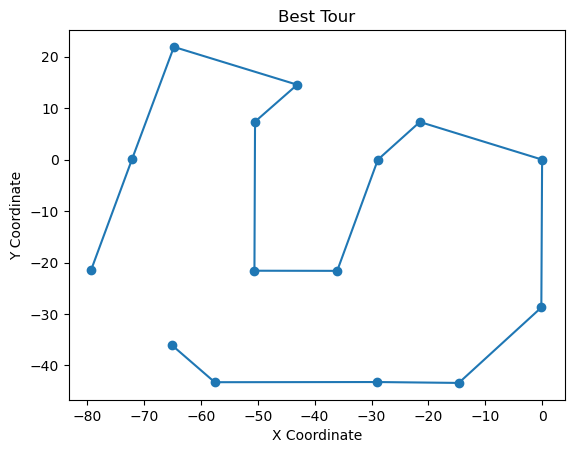

In [147]:


aco = ACO(cities, ants_count=10, alpha=1, beta=2, evaporation_rate=0.5, iterations=100)
best_ant, best_tour_length = aco.solve()

print("Best tour:", best_ant.visited)
print("Best tour length:", best_tour_length)
plot_best_tour(best_tour)